In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

# Zadanie 3
Prognozowanie temperatury z danymi meteorologicznymi. Przygotuj funkcję do wygenerowania przykładowych danych do pliku weather_data.csv. Wczytaj dane z pliku CSV lub
innych źródeł (internetowych). Zidentyfikuj i obsłuż brakujące wartości danych. Wykorzystaj metodę interpolacji splajnów B-sklejanych do prognozowania temperatury na podstawie danych meteorologicznych z różnych stacji pomiarowych. 

# Uwagi
Skorzystam z danych temperatur które już posiadam ale stworzę funkcję do generowania danych pogodowych.

In [2]:
# Wczytanie danych
data = pd.read_csv('data/temperatures.csv')
# Zamiana times na date bez potrzebnych godzin
data['time'] = pd.to_datetime(data['time']).dt.date
# Usunięcie rekordów gdzie 'time' się powtarza
data = data.drop_duplicates(subset='time')
# Sprawdzenie Nowych wymiarów
data.shape
data.head()


,time,temperature
0,2021-01-01,-1.9
24,2021-01-02,-1.5
48,2021-01-03,-0.3
72,2021-01-04,0.7
96,2021-01-05,1.4


([<matplotlib.axis.XTick at 0x2aa9de97130>,
 [Text(18628.0, 0, '2021-01-01'),
  Text(18728.0, 0, '2021-04-11'),
  Text(18828.0, 0, '2021-07-20'),
  Text(18928.0, 0, '2021-10-28'),
  Text(19028.0, 0, '2022-02-05'),
  Text(19128.0, 0, '2022-05-16'),
  Text(19228.0, 0, '2022-08-24'),
  Text(19328.0, 0, '2022-12-02'),
  Text(19428.0, 0, '2023-03-12'),
  Text(19528.0, 0, '2023-06-20'),
  Text(19628.0, 0, '2023-09-28')])

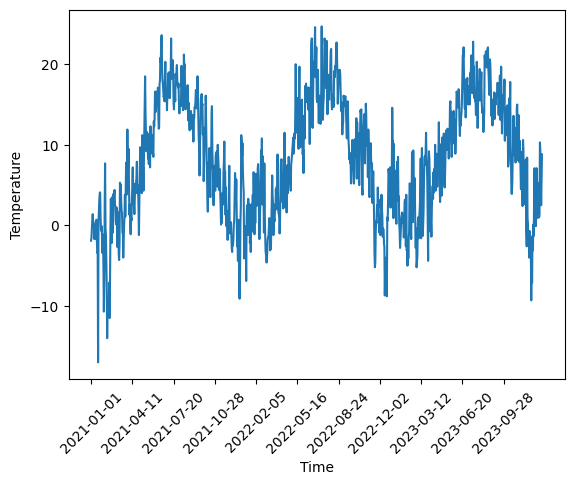

In [3]:
# Wyświetlenie wykresu temperatury
plt.plot(data['time'], data['temperature'])
# Wyświetlanie tylko część legendy na osi x
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(data['time'][::100], rotation=45)

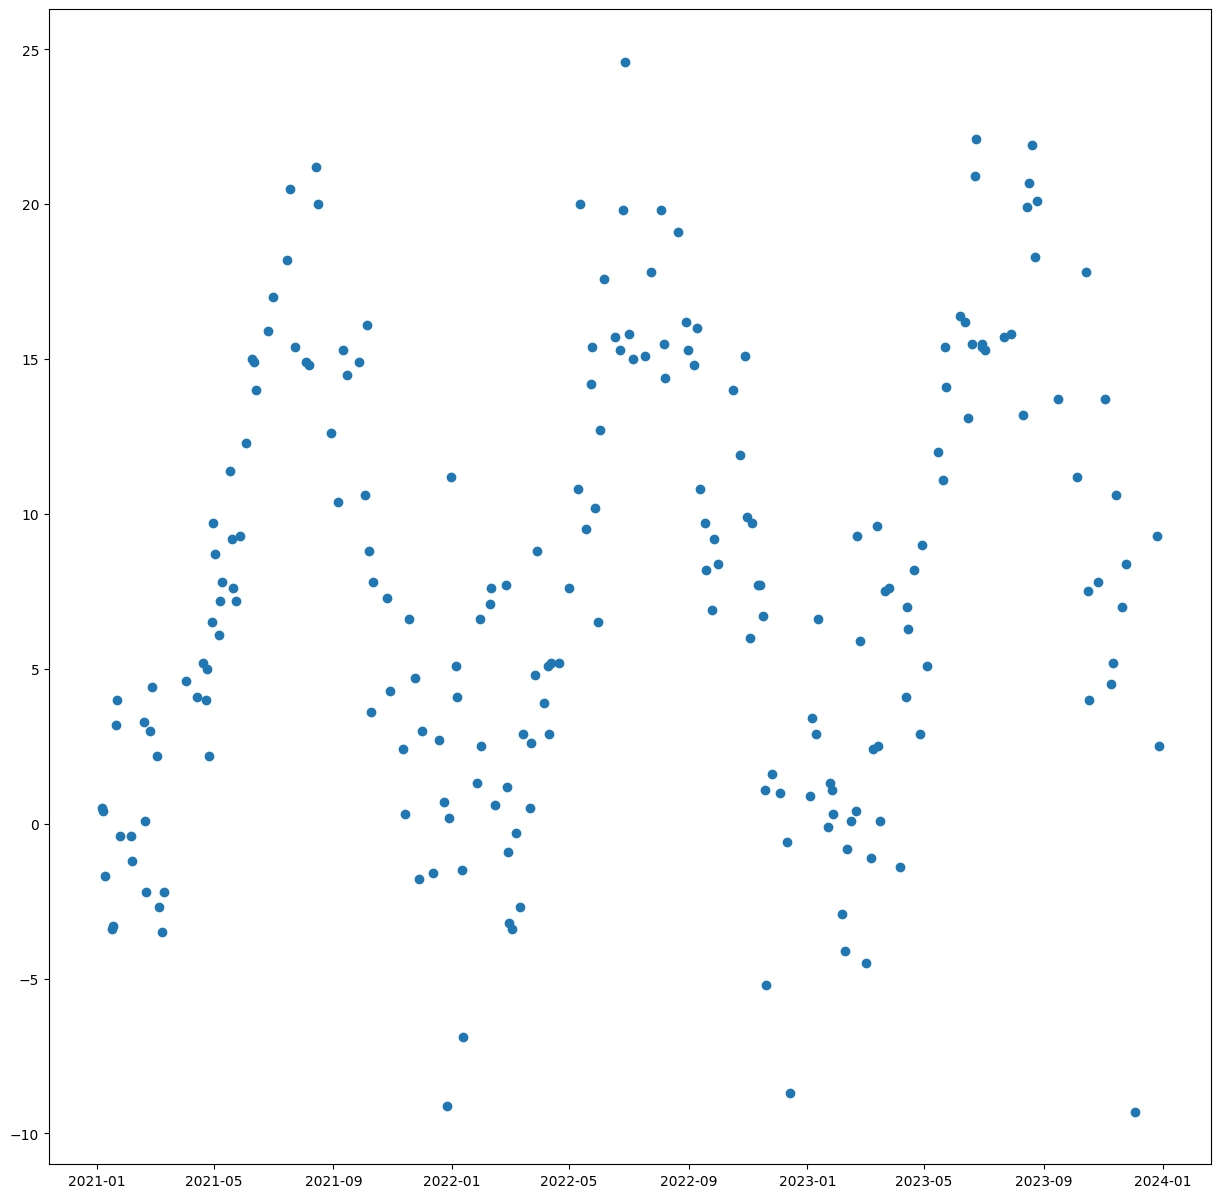

In [19]:
# Tworzenie Kopii danych
temp = []
n = 5
for a in range(n):
    temp.append(data.copy())
for a in range(n):
    temp[a]['temperature'] = temp[a]['temperature'].mask(np.random.random(data['temperature'].shape) < 0.8)

plt.scatter(data['time'], temp[0]['temperature'])

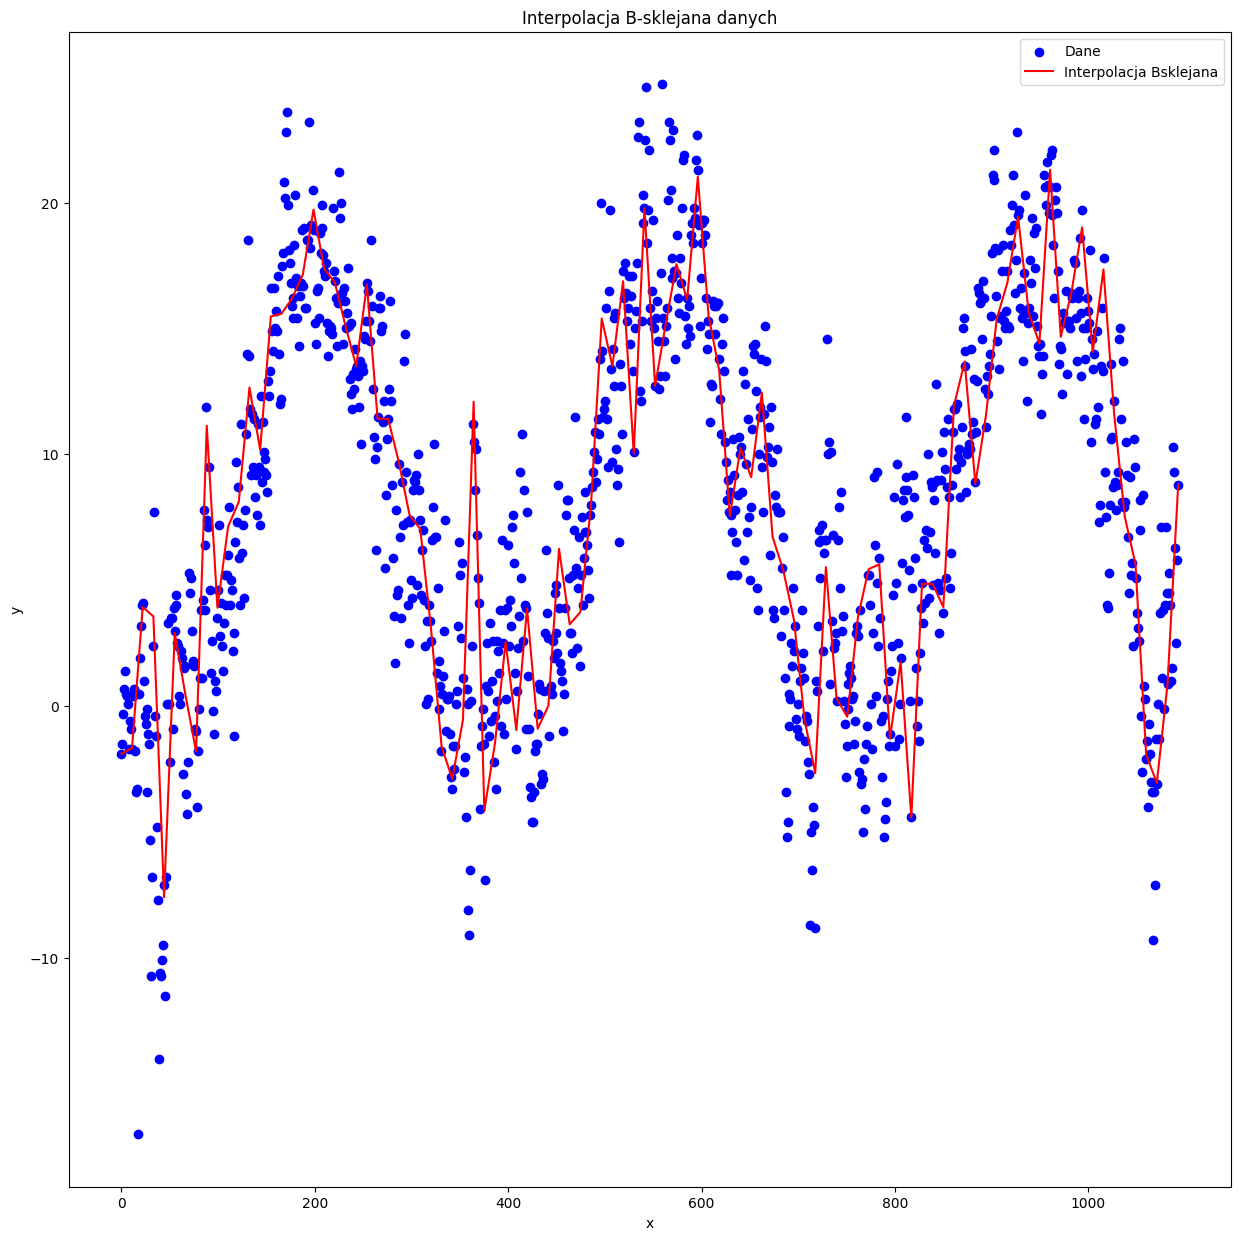

In [18]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Przykładowe dane
x_values = np.arange(len(data['time']))
y_values = data['temperature'].values
# Interpolacja B-sklejana
tck = splrep(x_values, y_values, k=3) # k=3 oznacza stopień krzywej Bsklejanej (tutaj wielomian trzeciego stopnia)
x_interpolated = np.linspace(min(x_values), max(x_values), 100)
y_interpolated = splev(x_interpolated, tck)
# Wykres
plt.scatter(x_values, y_values, color='blue', label='Dane')
plt.plot(x_interpolated, y_interpolated, color='red', label='Interpolacja Bsklejana')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja B-sklejana danych')
plt.legend()